In [3]:
!pip install --user astropy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 8.6 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
# Let's start with all necessary imports:
from __future__ import division
import os

#numpy
import numpy as np

#matplotlib 
import matplotlib.pylab as plt
from matplotlib import cm

#astropy
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
import astropy.units as u


In [7]:
#where the files are
# image_files_dir = '/Users/osaseomoruyi/Downloads/'
# xray_file = image_files_dir + 'rh701299n00_im_2.fits'
# optical_file = image_files_dir + 'cutout-CDS_P_SDSS9_color1.fits'
xray_file = 'rh701299n00_im_2.fits'
optical_file = 'cutout-CDS_P_SDSS9_color.fits'

In [8]:
#open the fits files, just like you did when following the tutorial yesterday
#more info here: https://learn.astropy.org/tutorials/FITS-images.html

xray_hdu = fits.open(xray_file)[0] # Open the .fits file, return a list of Header/Data Units (HDUs). 
xray_hdr = xray_hdu.header #The header of the data fits file and it tells you all technical info.
xray_wcs = WCS(xray_hdr)

opt_hdu = fits.open(optical_file)[0]
opt_hdr = opt_hdu.header
opt_wcs = WCS(opt_hdr)

Now we plot the X-ray data to make the best contour levels

/Users/brigettevazquez/.local/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = super().contour(*args, **kwargs)


(179.5, 361.5)

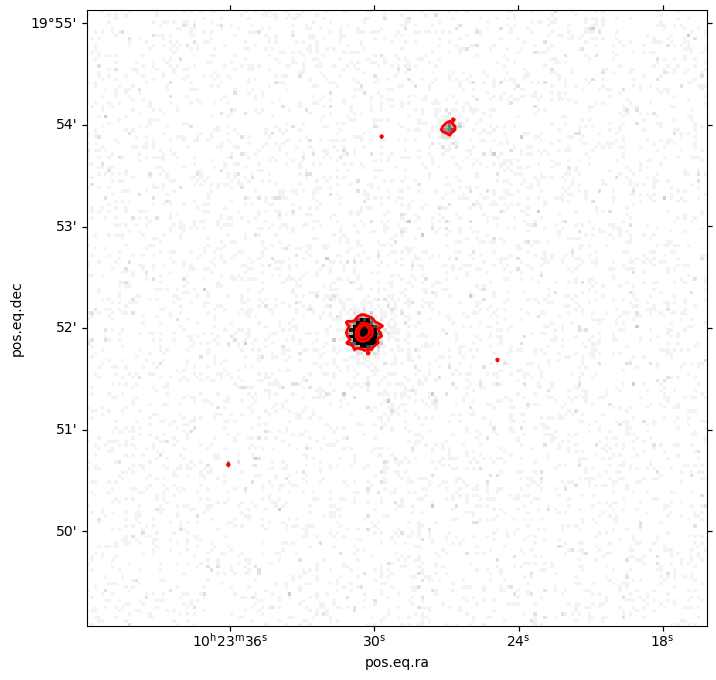

In [9]:
#plot xray data

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=WCS(xray_hdr))

xray_data = xray_hdu.data
cmap = cm.Greys #change color map here
vmin, vmax = 0, 10 #adjust brightness of image here

#the key to plotting with matplotlib is imshow
im = ax.imshow(xray_data, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto')


#plot xray contours over xray image to be sure we 
# are getting the structure we want to higlight

cont_vmin, cont_vmax, nlev = 3, 100, 3 #min and max value for contour levels, and number of levels wanted

#create evenly spaced contour levels
nlevels = (cont_vmax - cont_vmin)/nlev 
levels = np.arange(cont_vmin, cont_vmax, nlevels) 

cont_color='r'
alpha=1.0
lw = 2

#plot the contour levels created above over the xray image
transform = ax.get_transform(xray_wcs)
im_cont = ax.contour(xray_data, transform=transform, levels=levels, 
                        colors=cont_color, alpha = alpha, 
                        linewidths=lw, rasterized=True)

ax.set_xlim(179.5, 361.5)
ax.set_ylim(179.5, 361.5)

Now we can plot the xray contours over the optical data!

/Users/brigettevazquez/.local/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: The following kwargs were not used by contour: 'rasterized', 'fontsize', 'fontname'
  cset = super().contour(*args, **kwargs)


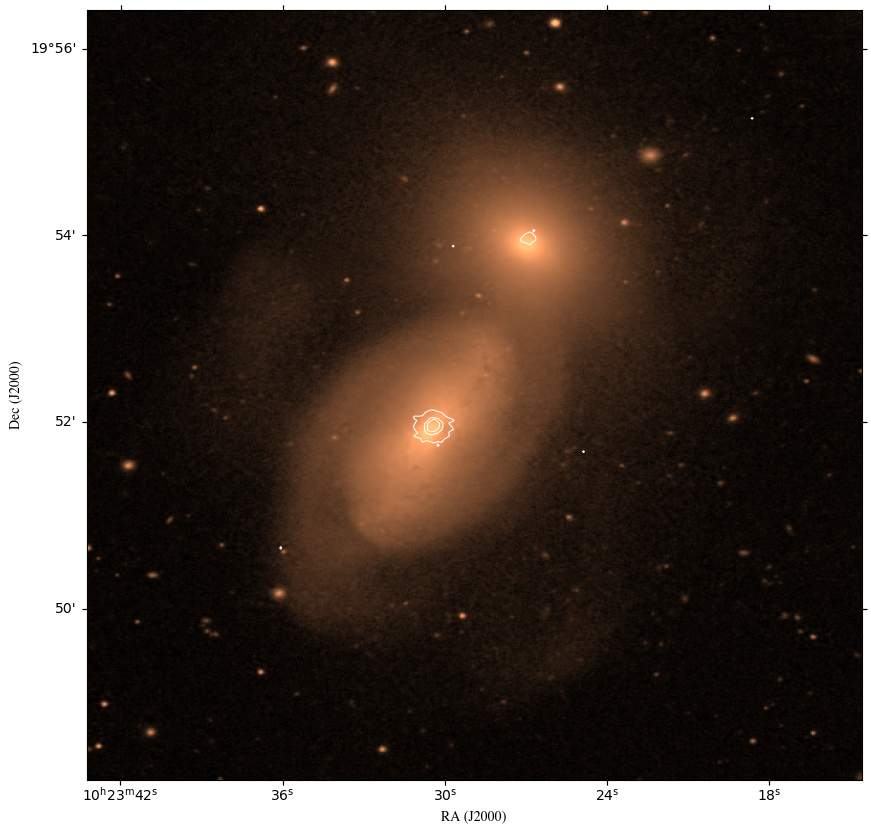

In [100]:
#plot optical data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=WCS(opt_hdr), slices=('x', 'y', 0))

opt_data = opt_hdu.data[0,:,:]
cmap = cm.copper #BrBG #Greys_r
vmin, vmax = 0,250#300
im = ax.imshow(opt_data, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto')#,  fontsize=18, fontname='Times')

#plot xray contours over optical image
cont_vmin, cont_vmax, nlev = 3, 100, 3 #min and max value for contour levels, and number of levels wanted

#create evenly spaced contour levels
nlevels = (cont_vmax - cont_vmin)/nlev 
levels = np.arange(cont_vmin, cont_vmax, nlevels) 

cont_color='white'
alpha=1.0
lw = 0.75

transform = ax.get_transform(xray_wcs)
im_cont = ax.contour(xray_data, transform=transform, levels=levels, 
                        colors=cont_color, alpha = alpha, 
                        linewidths=lw, rasterized=True, fontsize=18, fontname='Times')

#zoom in to the beautiful galaxy
ax.set_xlim(400.5, 849.5)
ax.set_ylim(200.5, 749.5)

#set nice axis labels
fs = 40
ax.set_xlabel('RA (J2000)', fontsize=fs, font="times")
ax.set_ylabel('Dec (J2000)', fontsize=fs, font="times")

plt.savefig('image.png', dpi=400)